In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pyplot as plt
from pyhocon.config_parser import ConfigFactory

from experiments.minigrid.train_worker import make_vec_envs, gen_env_with_seed

config = ConfigFactory.parse_file('../../experiments/minigrid/conf/minigrid_lava_first_step.hocon')

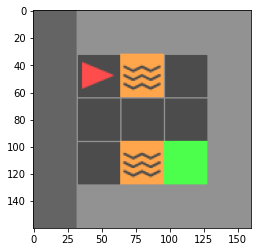

In [5]:
from experiments.minigrid.train_worker import gen_env
env = gen_env(config['env'])

plt.imshow(env.render('rgb_array'));

In [12]:

env = make_vec_envs(
    lambda env_id: lambda: gen_env_with_seed(config, env_id),
    config['training.n_processes'],
    config['agent.device']
)

In [13]:
from experiments.minigrid.train_worker import get_worker_agent

agent = get_worker_agent(env, config)

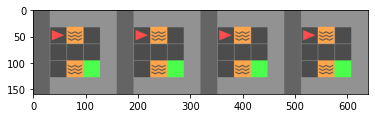

In [24]:
env = gen_env_with_seed(config, 4)
import numpy as np

images = []
for x in range(4):
    image = env.render('rgb_array')
    image = image[:, np.newaxis, :, :]
    images.append(image)
    _ = env.reset()

images = np.concatenate(images, axis=1)
images = images.reshape(images.shape[0], -1, images.shape[-1])
plt.imshow(images);

In [37]:
env.step(0)
s, r, d, i = env.step(2)
r, d

(0, False)

In [6]:
env.step(1)
env.step(2)
env.step(0)
env.step(2)
env.step(2)
env.step(1)
s, r, d, i = env.step(2)
r, d

(0.9369999999999999, False)

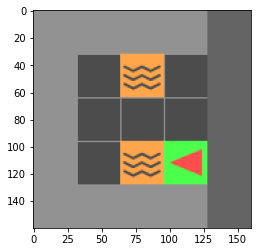

In [9]:
plt.imshow(env.render('rgb_array'));

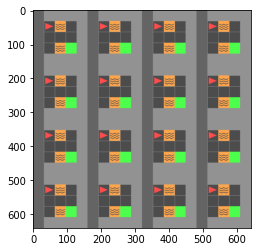

In [9]:
image = vec_env.render('rgb_array')
plt.imshow(image);

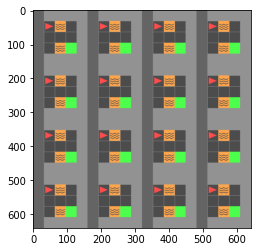

In [6]:
vec_env.reset()
image = vec_env.render('rgb_array')
plt.imshow(image);